# **ATIVIDADE DE IMPLEMENTAÇÃO – MODELOS CONTÍNUOS**


**(1) INTRODUÇÃO**

Para a realização desta atividade, consideraremos o modelo farmacocinético da concentração de álcool no corpo humano. A principal referência utilizada para esta atividade é (PIETERS, WEDEL e SCHAAFSMA, 1990). No trabalho, estuda-se a criação de um modelo para prever a concentração de álcool no sangue de pessoas que consomem uma quantidade inicial de álcool em função do tempo. Note-se que o consumo de álcool ocorre apenas 1 vez no início do processo.

**(1.1) OBTENÇÃO DE DADOS EXPERIMENTAIS**

O primeiro passo para a implementação de nosso modelo será a obtenção de dados experimentais a serem utilizados durante o processo de implementação. Em (PIETERS, WEDEL e SCHAAFSMA, 1990) pode-se obter uma figura com dados experimentais da evolução temporal da concentração de álcool nos corpos de um homem (1) e de uma mulher (2). A Figura 1 mostra o gráfico.


<img src="GraficoAlcool.png"/, width=600, height=600 style="float: center; margin: 0px 0px 10px 10px"> 
Figura 1: Concentração de álcool nos corpos de um homem (1) e de uma mulher (2). Os participantes do experimento ingeriram 3 doses de 9,5g de álcool dentro de um intervalo de 15 minutos e tiveram as concentrações de álcool no sangue medidas em intervalos de 10 em 10 minutos.

Para a digitalização dos dados sugerimos a utilização do aplicativo Plot Digitizer (http://plotdigitizer.sourceforge.net/) ou outro equivalente. Usando o aplicativo, você clica nos pontos experimentais e ele salva os dados em um arquivo CSV. A Figura 2 mostra os pontos clicados e o arquivo CSV gerado pelo aplicativo. Foram digitalizados apenas os dados relativos a concentração de álcool no sangue da mulher.

<img src="GraficoAlcoolDados.png"/, width=700, height=700 style="float: center; margin: 0px 0px 10px 10px"> 
Figura 2:Digitalização dos dados experimentais a partir de uma figura usando o aplicativo Plot Digitizer

Você pode fazer agora uma função em Python que lê os dados do arquivo CSV, ou digitar esses dados diretamente em seu programa. Foi isso que fizemos e a função que retorna as listas com os valores lidos a partir do gráfico chama-se RetornaDadosAlcool.
Para simplificação do modelo, os valores do tempo foram corrigidos de forma que o instante inicial foi definido como 0.

**(1.2) VERIFIQUE OS DADOS** 

O primeiro passo é você criar um gráfico com os dados experimentais.
A continuação se encontra a função RetornaDadosAlcool que retorna duas listas com os dados experimentais que foram digitalizados. 
Crie uma figura que mostra os dados digitalizados. O resultado deve ser parecido com o da Figura 3.

<img src="DadosExp.png"/, width=400, height=400 style="float: center; margin: 0px 0px 10px 10px"> 
Figura 3: Dados digitalizados para a concentração de Álcool no corpo humano

In [44]:
"""
 RetornaDadosAlcool
 Retorna os dados brutos para a concentracao de alcool:

   C,T=RetornaDadosAlcool()
   C lista com a concentração de Alcool no sangue (g/L)
   T lista com os instantes de medida (h) 
"""
def RetornaDadosAlcool():
    T = [0,
    0.17711,
    0.32959,
    0.57574,
    0.65737,
    0.83363,
    1.01054,
    1.22286,
    1.49576,
    1.72116,
    1.99386,
    2.52676,
    3.01276,
    3.49826,
    4.03046,
    4.51546,
    4.88196,
    5.99316,
    6.87976]
         
    C = [0.00139015,
    0.0158948,
    0.100132,
    0.248859,
    0.32782,
    0.402851,
    0.431829,
    0.462129,
    0.39244,
    0.338532,
    0.280685,
    0.20841,
    0.117706,
    0.0585803,
    0.0349891,
    0.0127055,
    0.0114537,
    0.00770054,
    0.00785546]
  
    return T, C


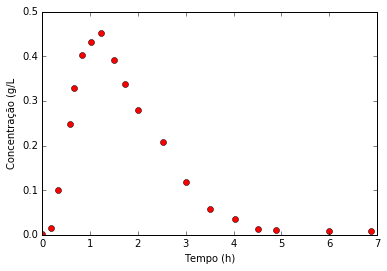

In [45]:
# Coloque aqui o código que gera o gráfico
import matplotlib.pyplot as plt
%matplotlib inline

T, C = RetornaDadosAlcool()

plt.plot(T, C, "ro")
plt.ylabel("Concentração (g/L")
plt.xlabel("Tempo (h)")
plt.show()


** (2) ITERAÇÃO 1**

O modelo mais simples possível para a concentração de álcool no corpo humano será dado por apenas um estoque como representado na Figura 4. Note que não se considera a entrada de álcool no sistema, já que se admite que ela ocorre apenas no instante inicial.

<img src="Modelo_1compartimento.png"/, width=300, height=300 style="float: center; margin: 0px 0px 10px 10px"> 
Figura 4: Modelo de 1 estoque para a concentração de álcool no corpo humano


A equação diferencial que descreve o comportamento do sistema é:

<img src="eqs_1compartimento.png"/, width=100, height=100 style="float: center; margin: 0px 0px 10px 10px"> 

O sistema tem apenas 1 parâmetro, que é a constante 𝑘.  Co corresponde à concentração inicial. O que precisamos é determinar a função 𝐶(t) a partir do fato de conhecermos o valor de sua derivada. Para isso, vamos usar um Algoritmo de Integração Numérica. Em Python, existe uma implementação muito complexa desse tipo de algoritmo e que funciona extremamente bem para quase qualquer tipo de equação diferencial.

*** (2.1) IMPLEMENTAÇÃO*** 

A função que usaremos é chamada **odeint** e está disponível no pacote scipy.integrate. Para usar a função, inclua no seu codigo a linha:

from scipy.integrate import odeint

A função odeint recebe 3 parâmetros:

• func: Uma função que determina o valor de dC/dt em função de 𝐶 e 𝑡, de forma que dC/dt = func

• Co: O valor inicial da função C(t)

• T: Uma lista com os instantes de tempo para os quais o valor da função deve ser determinado.

A função retorna uma matriz contendo os valores calculados para a função C(t). 

Crie uma função chamada **func1** que calcula o valor de dC/dt em função de 𝐶 e 𝑡,  nesta ordem. Utilize essa função para calcular o valor de C(t) para os instantes determinados pela função RetornaDadosAlcool. Utilize 𝑘 = 0,5 e Co= 0,5 como ponto de partida. Varie seu valor e verifique o comportamento do sistema.

Você deve obter algo semelhante ao mostrado na Figura 5.


<img src="Figura5.png"/, width=400, height=400 style="float: center; margin: 0px 0px 10px 10px"> 
Figura 5: Resultado da integração do sistema de 1 compartimento

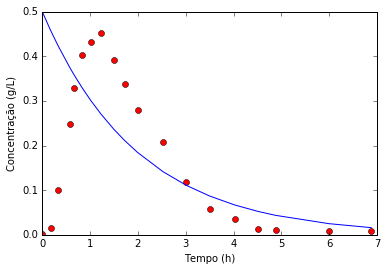

In [46]:
# Coloque aqui o código que gera o gráfico

k = 0.5

def func1 (C, T):
    DcDt = -k*C
    return DcDt

from scipy.integrate import odeint

Co = 0.5

solucao = odeint(func1, Co, T)

plt.plot(T, C, "ro")
plt.plot(T, solucao)
plt.ylabel("Concentração (g/L)")
plt.xlabel("Tempo (h)")
plt.show()

***(3) ITERAÇÃO 2***

Como se pode ver na Figura 5, o modelo de 1 compartimento não apresenta o comportamento real do sistema, já que não leva em consideração o tempo para a absorção do álcool pelo corpo. Assim, escolhemos o modelo indicado na Figura 6 como próximo passo de nosso desenvolvimento. Nele, inclui-se um novo compartimento, que corresponde ao estômago da pessoa.

<img src="Modelo_2compartimentos.png"/, width=500, height=500 style="float: center; margin: 0px 0px 10px 10px"> 
Figura 6: Modelo de 2 estoques para a concentração de álcool no corpo humano


As equações diferenciais que descrevem o comportamento do sistema nesta iteração são:
<img src="eqs_2compartimentos.png"/, width=200, height=200 style="float: center; margin: 0px 0px 10px 10px"> 


**(3.1) IMPLEMENTAÇÃO**

Agora para fazer a integração numérica das duas equações simultaneamente, precisamos definir um vetor, p. ex. 𝑌 = [E, C]. Crie agora uma função **func2** que recebe um vetor 𝑌 e o tempo 𝑡 como parâmetros e retorna um vetor com os valores das derivadas de cada uma das funções, ou seja [dE/dt, dC/dt].
Depois, utilize essa função para realizar a integração numérica do sistema de equações. Sugerimos os seguintes valores iniciais: Eo= 0,5, Co= 0, ke= 1 𝑒 𝑘 = 0,5.
Você deve obter algo semelhante ao mostrado na Figura 7.


<img src="Figura7.png"/, width=400, height=400 style="float: center; margin: 0px 0px 10px 10px"> 
Figura 7: Resultado da integração do sistema de 2 compartimentos



[[ 0.5         0.        ]
 [ 0.41884382  0.07756513]
 [ 0.35960928  0.12884899]
 [ 0.28114432  0.18757044]
 [ 0.25910623  0.20165729]
 [ 0.21723466  0.22467353]
 [ 0.18201118  0.23932029]
 [ 0.14719351  0.24818741]
 [ 0.11203912  0.24929079]
 [ 0.08942928  0.24405817]
 [ 0.0680844   0.23284177]
 [ 0.03995876  0.20277937]
 [ 0.0245779   0.17255531]
 [ 0.01512499  0.14367522]
 [ 0.00888308  0.11552359]
 [ 0.00546929  0.09364906]
 [ 0.00379107  0.07949334]
 [ 0.00124788  0.04746187]
 [ 0.00051419  0.03104014]]


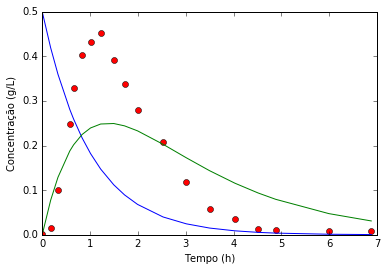

In [62]:
# Coloque aqui o código que gera o gráfico
#p.ex.𝑌 = [E, C]

    
Eo= 0.5
Co= 0 
ke= 1 
k = 0.5


def func2(Y, t):
    dEdT = -ke*Y[0]
    dCdT = ke*Y[0] - k*Y[1]
    return dEdT, dCdT
condicoesiniciais = [Eo, Co]
solucao2 = odeint(func2, condicoesiniciais ,T )
    
print(solucao2)

plt.plot(T, C, "ro")
plt.plot(T, solucao2)
plt.ylabel("Concentração (g/L)")
plt.xlabel("Tempo (h)")
plt.show()

Agora, você pode tentar achar parâmetros que façam o comportamento do modelo se aproximar dos dados experimentais. Para decidir quais parâmetros e como modificá-los, vamos olhar em detalhe quão bem nosso modelo descreve quantitativamente o comportamento do sistema real. Por exemplo, quão rápido o álcool é eliminado? Ou quão bem prevemos a concentração máxima de álcool no corpo? Que fatores afetam este valor?

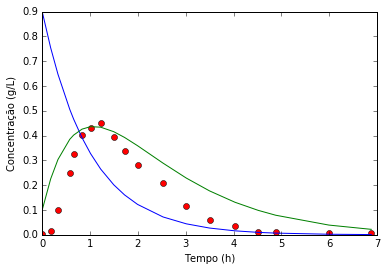

In [61]:
# Coloque seu código para ajustar os parâmetros aqui

Eo= 0.9
Co= 0.1
ke= 1
k = 0.7


def func2(Y, t):
    dEdT = -ke*Y[0]
    dCdT = ke*Y[0] - k*Y[1]
    return dEdT, dCdT
condicoesiniciais = [Eo, Co]
solucao2 = odeint(func2, condicoesiniciais ,T )
    
plt.plot(T, C, "ro")
plt.plot(T, solucao2)
plt.ylabel("Concentração (g/L)")
plt.xlabel("Tempo (h)")
plt.show()


**(4) REFERÊNCIAS** 

PIETERS, J. E.; WEDEL, M.; SCHAAFSMA, G. Parameter Estimation in a three-compartment model for blood alcohol curves. Alcohol & Alcoholism, 25, 1990. 17-24.